In [65]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV, StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRFRegressor,XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor

# **Feature Engineering + Feature Selection**

In [2]:
#Reading in the data
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/Housing-Prices-Prediction/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/Housing-Prices-Prediction/test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#Information gathering
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [6]:
#Getting insights of the features and outliers
df_train.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [7]:
#Getting insights on test dataset as well
df_test.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
99%,2904.420000,190.000000,130.690000,26210.340000,9.000000,9.000000,2008.000000,2009.000000,736.280000,1682.860000,896.590000,1731.440000,2203.440000,2363.260000,1379.940000,0.000000,2798.420000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.00000,2008.000000,3.000000,1040.430000,492.520000,276.840000,264.420000,0.000000,255.000000,0.000000,1326.000000,12.000000,2010.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [8]:
#Checking percentage of null values present in training dataset 
missing_num = df_train.isna().sum().sort_values(ascending=False)
missing_perc = (df_train.isna().sum()/len(df_train)*100).sort_values(ascending=False)
missing_perc

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

EDA only for learning purposes done separately. Else you should always combine both the train and test sets and then only perform EDA for easier analysis. That is done later anyways.

In [15]:
#Calculating percentage of null values
def null_values(dataframe):
  missing_values = dataframe.isna().sum().sort_values(ascending=False)
  missing_perc = (((dataframe.isna().sum())/len(dataframe))*100).sort_values(ascending=False)
  return missing_values, missing_perc

#Passing in the training and test datasets to calculate the percentage of missing values in training and test data
null_sum_train, null_perc_train = null_values(df_train)
null_sum_test, null_perc_test = null_values(df_test)

In [10]:
null_sum_train

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [11]:
null_perc_train

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [16]:
miss_train_sum_perc = pd.concat([null_sum_train, null_perc_train], axis=1, keys=['Sum', 'Percentage'])
miss_test_sum_perc = pd.concat([null_sum_test, null_perc_test], axis=1, keys=['Sum', 'Percentage'])

In [17]:
miss_train_plot = miss_train_sum_perc[miss_train_sum_perc['Percentage']>0]
miss_train_plot

,Sum,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [14]:
miss_test_plot = miss_test_sum_perc[miss_test_sum_perc['Percentage']>0]
miss_test_plot

,Sum,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


**19 attributes have missing values and 5 features( PoolQC,MiscFeature,Alley,Fence,FireplaceQu) have missing percentage greater than 45%**

In [18]:
#Printing the numerical dataframe
df_numerical_train = df_train.select_dtypes(include=['int64','float64']).drop(['SalePrice','Id'],axis=1)
df_numerical_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [19]:
#Printing the categorical dataframe
df_categorical_train = df_train.select_dtypes(exclude=['int64','float64'])
df_categorical_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Data Visualization

In [20]:
#Important 
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),
                    textcoords='offset points',fontweight='light',alpha=0.9)

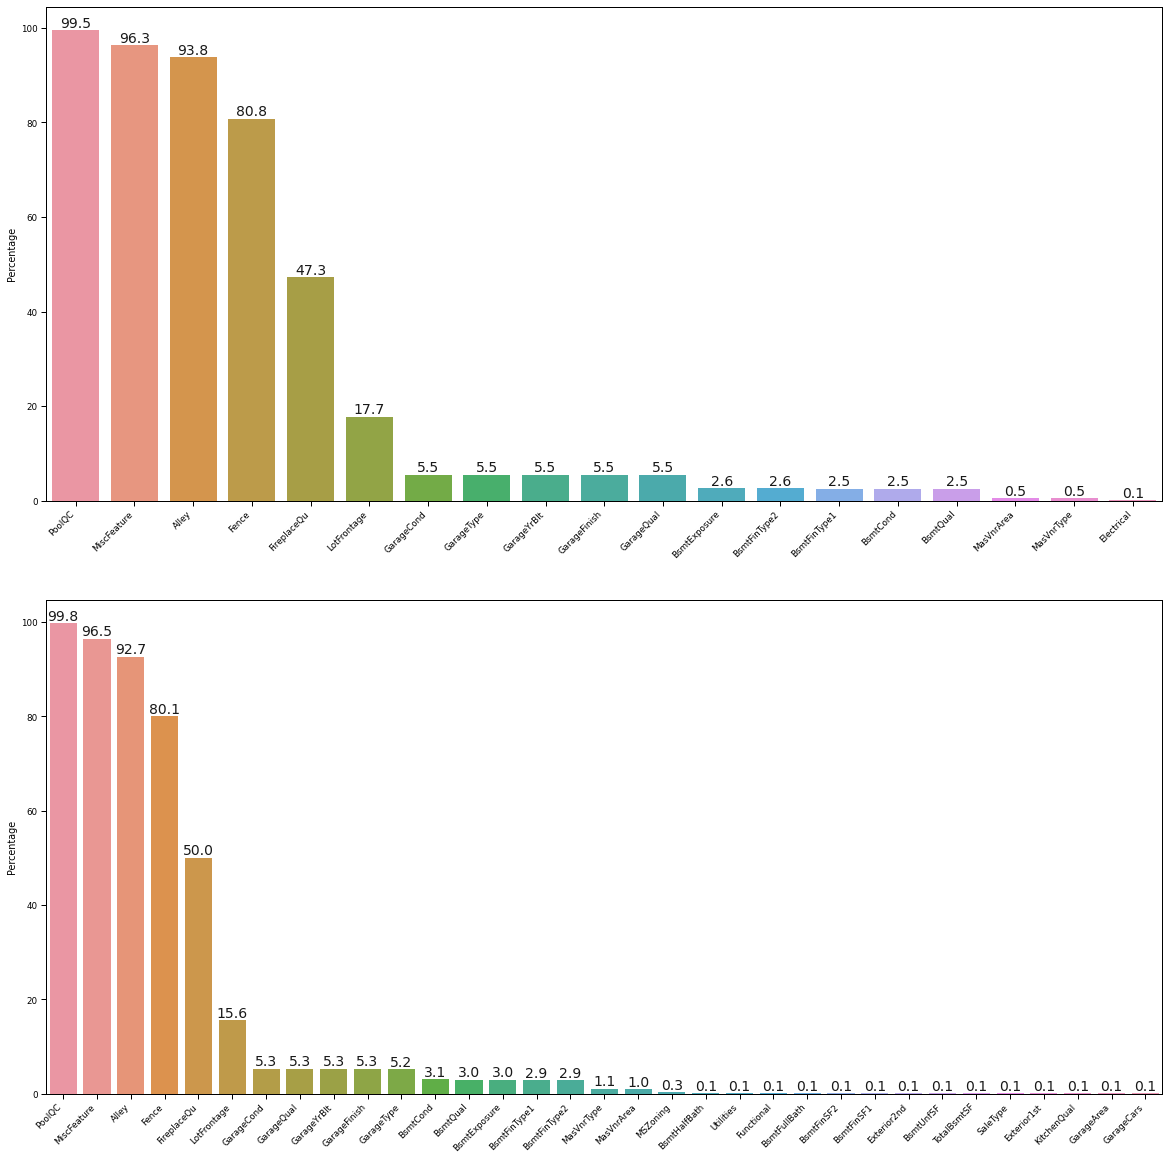

In [21]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=miss_train_plot.index, y='Percentage', data=miss_train_plot)
showvalues(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=miss_test_plot.index, y='Percentage', data=miss_test_plot)
showvalues(ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [22]:
#Dropping Id columns from train and test sets
df_train.drop(['Id'], axis=1)
df_test.drop(['Id'], axis=1)
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [20]:
len(df_train.select_dtypes(include=['int64','float64']).columns)

38

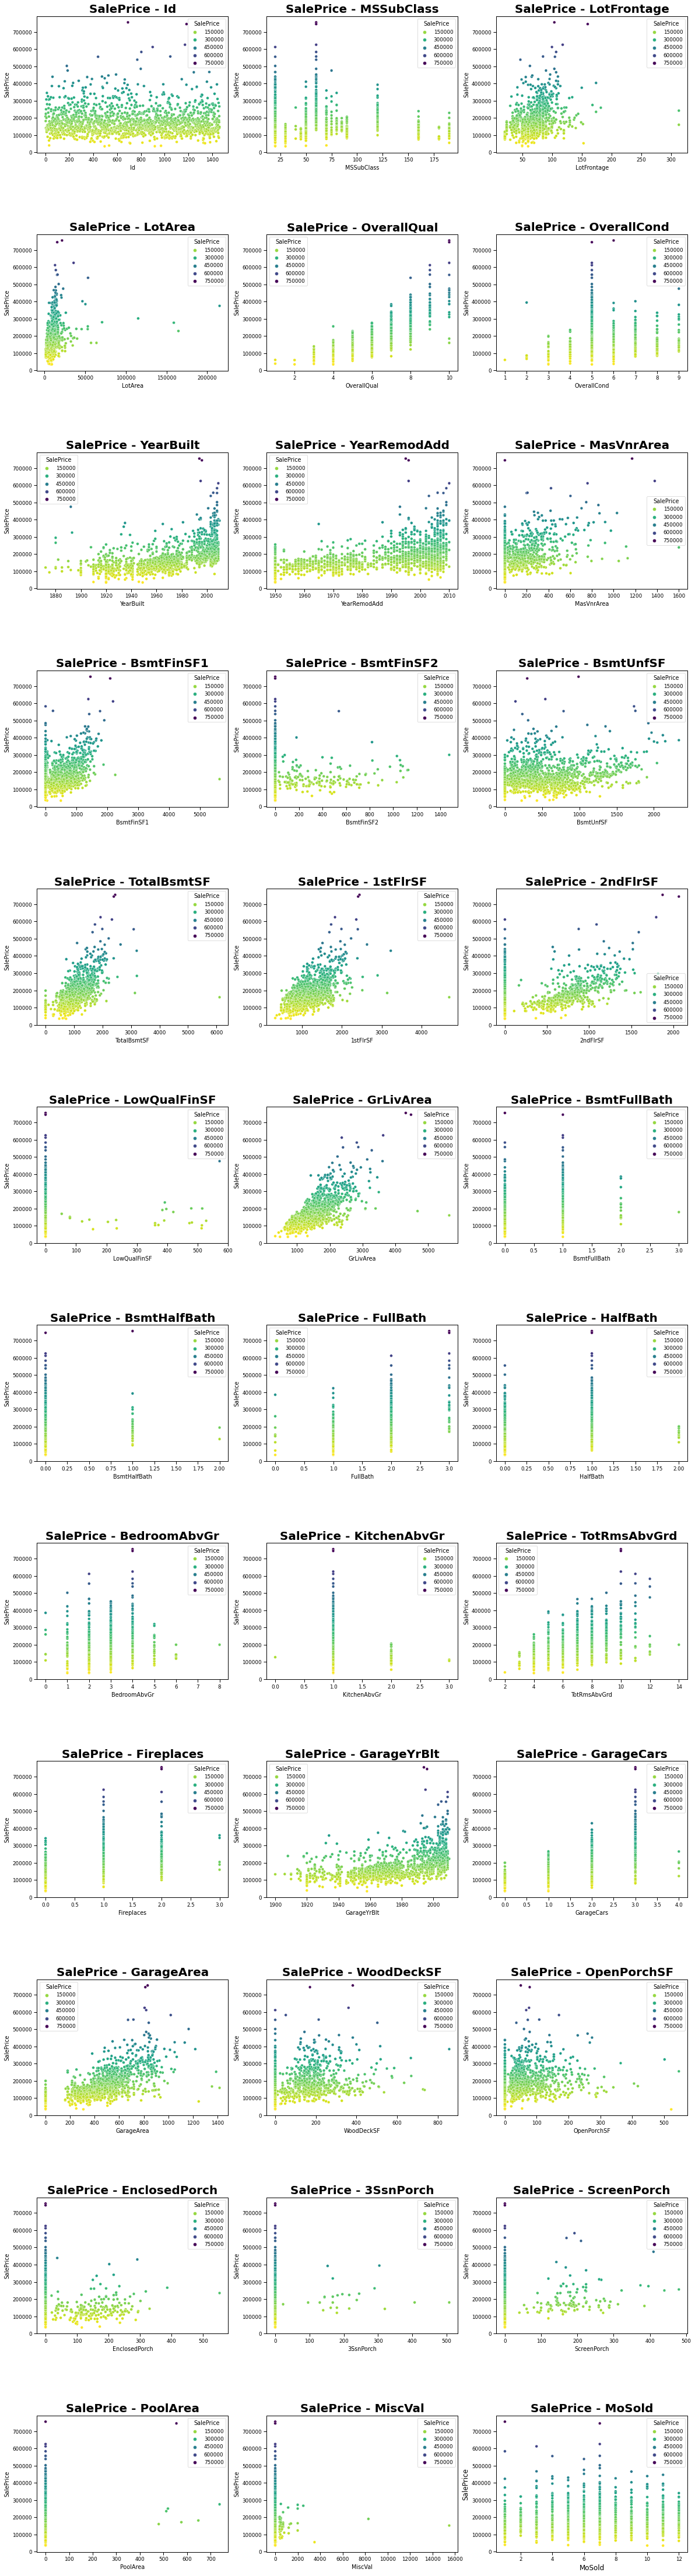

In [23]:
#Visualising numerical predictor variables with Target Variables, and this as well can be used for univariate distributions as well
df_train_num = df_train.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20, 80))
#adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)

#We need to flatten the axes for iterating over them. Here the axes in the dimension [12, 3] is transformed to a vector consisting of 12*3 = 36 values.
for i,ax in zip(df_train_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_train,ax=ax,palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)

#ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

#Usually vertically stacked-line columns don't have much outliers

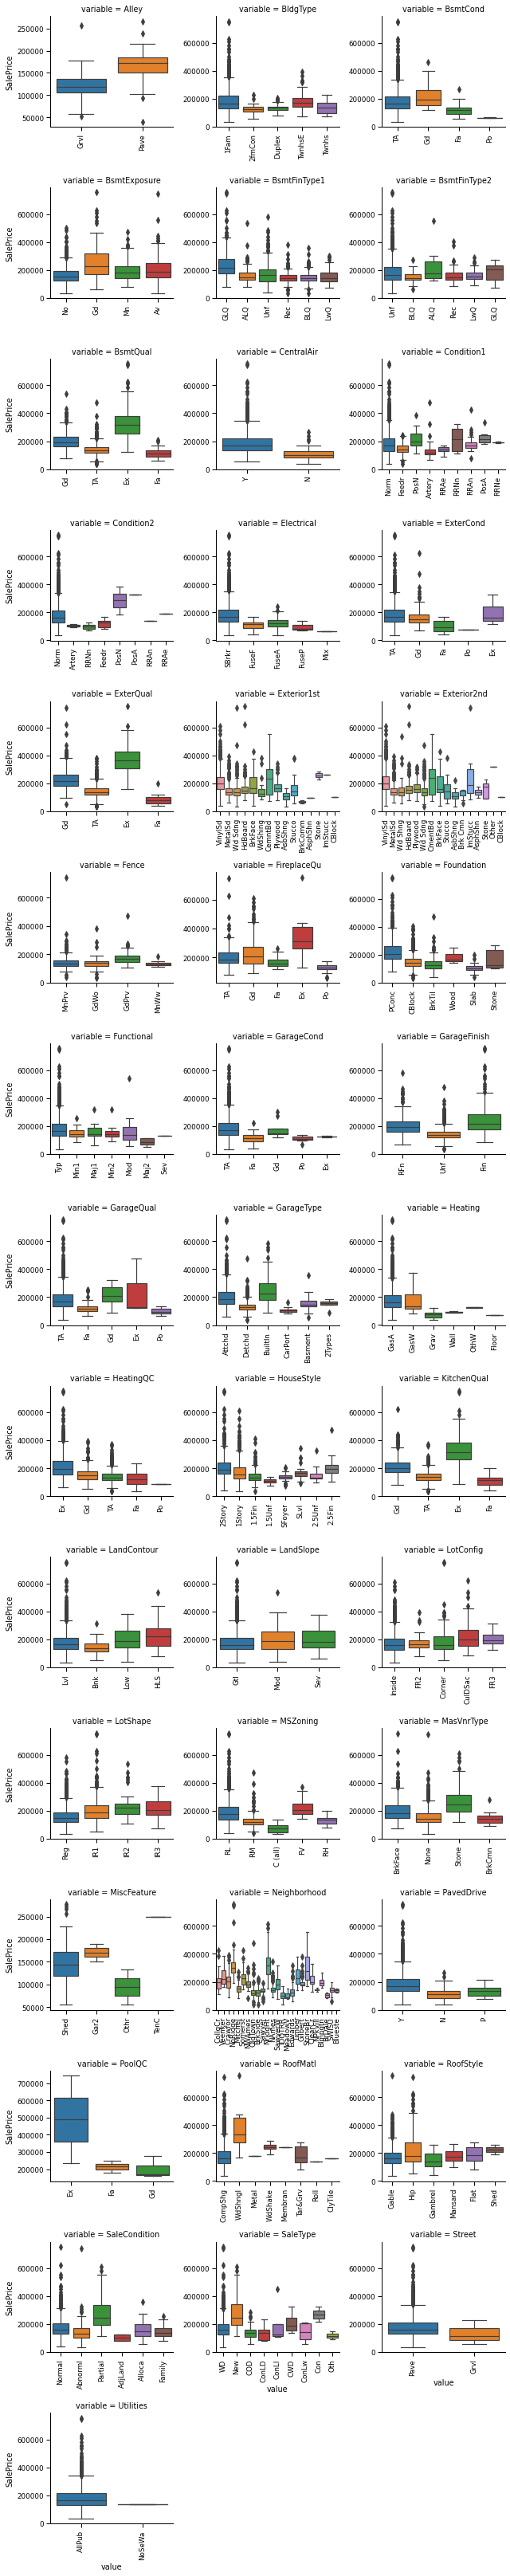

In [24]:
#Visualizing categorical predictors with target variable
def facetgrid_boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x = plt.xticks(rotation=90)

#pd.melt is a useful function. You have written its functionality in your notebook.
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(df_categorical_train.columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)

#Mapping onto the function where it will plot the boxplot
g = g.map(facetgrid_boxplot, 'value', 'SalePrice')

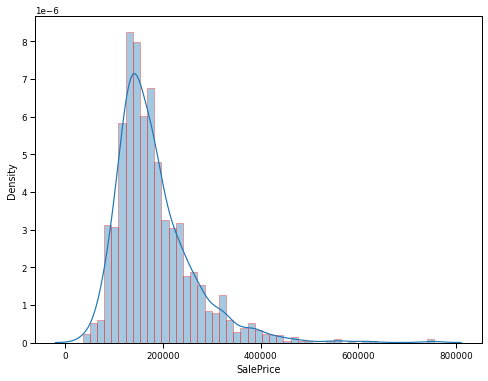

In [25]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(df_train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

***SalePrice isn't normally distributed. It is positively or right skewed.***

In [26]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [27]:
#Applying log transformation to remove skewness and make target variable normally distributed(we apply natural log here)
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

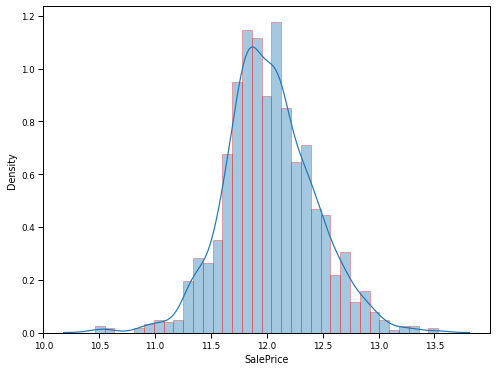

In [28]:
#Distribution of Target variable (SalePrice) - again to see if the skewness has been removed
plt.figure(figsize=(8,6))

#hist_kws parameter refers to edgecolour of bins in histogram
sns.distplot(df_train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})
#Now saleprice is normally distributed

<Figure size 2160x1440 with 0 Axes>

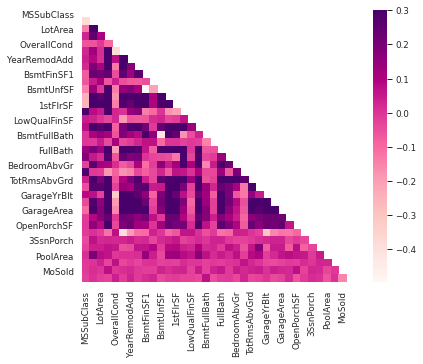

In [29]:
#Plotting the Pearsson's correlation heatmap between the numerical features
#The code has been derived from Seaborn API docs.
plt.figure(figsize=(30, 20))
corr = df_numerical_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='RdPu')

Hence we can see there is a high degree of multicollinearity in the dataset. We can either drop them by performing certain feature selection techniques or let some regularization ML techniques(such as Lasso and Ridge regression), do the needful.

We will perform some advanced Feature Engineering techniques such as:
1. Outlier Detection and removal(for extremely skewed distributions of features)
2. Missing Value Imputation
3. Scaling and Normalization(if required)





In [31]:
#Let's concatenate the train and test datasets together and study them simultaneously
y = df_train['SalePrice']
df_train = df_train.drop(['SalePrice'], axis = 1)
df_combined = pd.concat([df_train, df_test], axis=0)

In [32]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [33]:
columns = df_combined.columns.tolist()
numerical_cols = [col for col in df_combined.columns if df_combined[col].dtype != 'object']
categorical_cols = [col for col in columns if col not in numerical_cols]

In [34]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [35]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

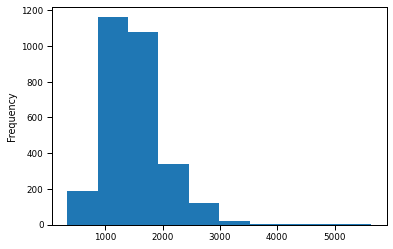

In [36]:
#Visualizing several numerical features:(individually)
df_combined['GrLivArea'].plot.hist()

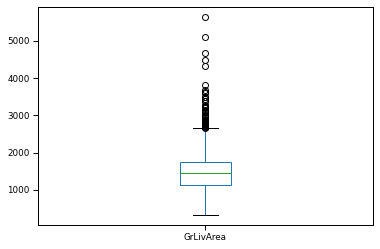

In [37]:
df_combined['GrLivArea'].plot.box()

In [35]:
#Since the feature has qyuite a large number of outliers in upper bridge, we will try capturing and replacing them

In [38]:
quantile75 = df_combined['GrLivArea'].quantile(0.75)
quantile25 = df_combined['GrLivArea'].quantile(0.25)
IQR = quantile75 - quantile25
IQR
print(quantile75)

1743.5


In [39]:
extreme_upper = df_combined['GrLivArea'].quantile(0.75) + 4.5 * IQR
extreme_lower = df_combined['GrLivArea'].quantile(0.25) + 3 * IQR
extreme_upper

4522.25

In [40]:
#Let's replace the outliers in upper part of feature set with 75th quantile values
df_combined.loc[df_combined['GrLivArea']>=4500, 'GrLivArea'] = quantile25
#Or you can also choose to drop these outlier values from dataframe

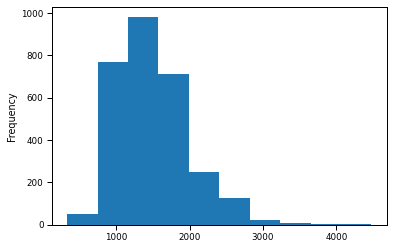

In [41]:
df_combined['GrLivArea'].plot.hist()

In [42]:
df_combined['age']=df_combined['YrSold']-df_combined['YearBuilt']

# See why its been done like this
# Some of the non-numeric predictors are stored as numbers; convert them into strings will convert those columns into dummy variables later.
df_combined['MSSubClass'] = df_combined[['MSSubClass']].astype(str) 
df_combined['YrSold'] = df_combined['YrSold'].astype(str) #year
df_combined['MoSold'] = df_combined['MoSold'].astype(str) #month

In [43]:
df_combined[numerical_cols].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [44]:
df_combined[categorical_cols].isna().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [45]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
df_combined['Functional'] = df_combined['Functional'].fillna('Typ')
df_combined['Electrical'] = df_combined['Electrical'].fillna('SBrkr') #Filling with modef

# data description states that NA refers to "No Pool"
df_combined['PoolQC'] = df_combined['PoolQC'].fillna("Missing")

# Replacing the missing values with 0, since no garage = no cars in garage inferred from data dictionary
df_combined['GarageYrBlt'] = df_combined['GarageYrBlt'].fillna(0)
 
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna("TA")
df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['SaleType'] = df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0])

#None means no Garage
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
   df_combined[col] = df_combined[col].fillna("Missing")

#None means no Basement
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  df_combined[col] = df_combined[col].fillna("Missing")

df_combined['MSZoning'] = df_combined.groupby('MSSubClass')['MSZoning'].transform(lambda x : x.fillna(x.mode()[0]))
#The pandas update function is used to 'Modify in place using non-NA values from another DataFrame. Aligns on indices. There is no return value.'
#All of the above is stated according to documentation.
object_cols = []
for col in categorical_cols:
  if col != 'Source':
    object_cols.append(col)
df_combined.update(df_combined[object_cols].fillna("Missing"))
df_combined.update(df_combined[numerical_cols].fillna(0))

In [46]:
df_combined[categorical_cols].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [47]:
df_combined[numerical_cols].isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [49]:
#Hence we have successfully imputed all missing values with required variables
#One more thing to be learnt 
df_combined.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

Handling skewness in predictor variables:

In [50]:
#We have already removed skewness from target variable, we need to check out the skewness among various features too
df_combined_num = df_combined.select_dtypes(['int64', 'float64'])
skew_features = df_combined_num.apply(lambda x : x.skew()).sort_values(ascending=False)

skew_high = skew_features[skew_features > 0.6] 
#This command returns a series
#Krish Naik teaches skewness very well

high_indices = skew_high.index
#This returns a list of indices

skew_high
#Writing 

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.614936
OpenPorchSF       2.536417
WoodDeckSF        1.843380
1stFlrSF          1.470360
BsmtFinSF1        1.425963
TotalBsmtSF       1.157489
GrLivArea         0.973948
BsmtUnfSF         0.919812
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.625153
dtype: float64

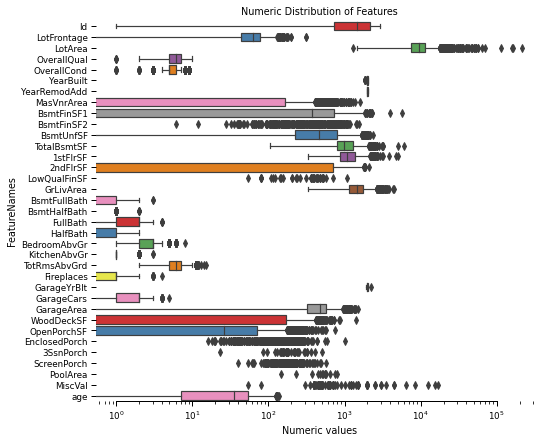

In [51]:
#Refer this for boxplot(numerical value distribution)
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_combined_num , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="FeatureNames")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [52]:
#Normalize skewed features using a box-cox normal distribution, we can surely use other techniques but it works very well on this dataset
#Check out for other techniques used to normalize skewed features(sum of them being)
#People usually use box-cox and StandardScaler for removing skewed data
for i in high_indices:
    #What's this 1.002 used for?
    df_combined[i] = boxcox1p(df_combined[i], boxcox_normmax(df_combined[i] + 1.002))

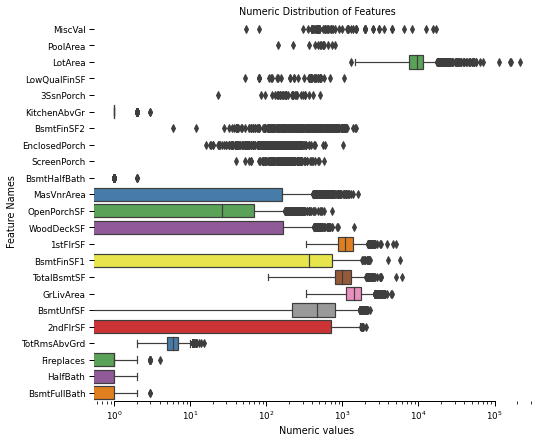

In [53]:
#Refer this for boxplot(numerical value distribution)
fig, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_combined_num[high_indices] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature Names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

Hence we observe that the outlier treatment has been taken care of through box-cox transformation

In [54]:
from scipy import stats
high_indices_list = list(high_indices)

In [52]:
# nrows = 11
# ncols = 2

# fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))

# #Initializing lazy counter
# count = 0

# for i in range(nrows):
#   for j in range(ncols):
#       ax = axes[i, j]

#       if count < len(high_indices.tolist()):
#         ax.plot(df_combined[high_indices_list[count]])
#         ax.set(xlabel="Feature Names")
#         ax.title("Skewness distribution of a feature variable")

In [55]:
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_combined['Utilities'].value_counts())
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_combined['Street'].value_counts())
#NOt useful columns in our predictions, more than 99% rows have same value.
print(df_combined['PoolQC'].value_counts())

AllPub     2916
Missing       2
NoSeWa        1
Name: Utilities, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Missing    2909
Ex            4
Gd            4
Fa            2
Name: PoolQC, dtype: int64


In [56]:
#As we can see above, those columns have very little other useful data as their values and are primarily composed of a single feature. It would be better 
#if we drop them as they are adding up as a redundant feature without giving much insights about the data.
df_combined = df_combined.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

In [57]:
#The main difference between apply and transform functions is that while apply passes the dataframe in the form of columns to the custom function, 
#whereas the transform method passes the dataframe as a series to the custom function.
#Let's check out the number of 0's in dataset
for col in numerical_cols:
  print(col, "\t", len(list(df_combined.loc[df_combined[col] == 0, col].index)))
#Hence we can observe there are many columns containing 0 as a value
#We need some way to remove their unusefulness as they may be useful

Id 	 0
MSSubClass 	 0
LotFrontage 	 486
LotArea 	 0
OverallQual 	 0
OverallCond 	 0
YearBuilt 	 0
YearRemodAdd 	 0
MasVnrArea 	 1761
BsmtFinSF1 	 930
BsmtFinSF2 	 2572
BsmtUnfSF 	 242
TotalBsmtSF 	 79
1stFlrSF 	 0
2ndFlrSF 	 1668
LowQualFinSF 	 2879
GrLivArea 	 0
BsmtFullBath 	 1707
BsmtHalfBath 	 2744
FullBath 	 12
HalfBath 	 1834
BedroomAbvGr 	 8
KitchenAbvGr 	 3
TotRmsAbvGrd 	 0
Fireplaces 	 1420
GarageYrBlt 	 159
GarageCars 	 158
GarageArea 	 158
WoodDeckSF 	 1523
OpenPorchSF 	 1298
EnclosedPorch 	 2460
3SsnPorch 	 2882
ScreenPorch 	 2663
PoolArea 	 2906
MiscVal 	 2816
MoSold 	 0
YrSold 	 0


In [58]:
df_combined['PoolArea'+'_impute'] = df_combined['PoolArea'].apply(lambda x : 1 if x>0 else 0)
df_combined['MiscVal'+'_impute'] = df_combined['MiscVal'].apply(lambda x : 1 if x>0 else 0)
df_combined['ScreenPorch'+'_impute'] = df_combined['ScreenPorch'].apply(lambda x : 1 if x>0 else 0)
df_combined['3SsnPorch'+'_impute'] = df_combined['3SsnPorch'].apply(lambda x : 1 if x>0 else 0)
df_combined['EnclosedPorch'+'_impute'] = df_combined['EnclosedPorch'].apply(lambda x : 1 if x>0 else 0)
df_combined['WoodDeckSF'+'_impute'] = df_combined['WoodDeckSF'].apply(lambda x : 1 if x>0 else 0)
df_combined['OpenPorch'+'_impute'] = df_combined['OpenPorchSF'].apply(lambda x : 1 if x>0 else 0)
df_combined['HalfBath'+'_impute'] = df_combined['HalfBath'].apply(lambda x : 1 if x>0 else 0)
df_combined['Fireplaces'+'_impute'] = df_combined['Fireplaces'].apply(lambda x : 1 if x>0 else 0)
df_combined['Fireplaces'+'_impute'] = df_combined['Fireplaces'].apply(lambda x : 1 if x>0 else 0)
df_combined['2ndFlrSF'+'_impute'] = df_combined['2ndFlrSF'].apply(lambda x : 1 if x>0 else 0)
df_combined['LowQualFinSF'+'_impute'] = df_combined['LowQualFinSF'].apply(lambda x : 1 if x>0 else 0)

In [59]:
#Why the heck did we do this?
df_combined['TotalBsmtSF'] = df_combined['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_combined['2ndFlrSF'] = df_combined['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df_combined['LotFrontage'] = df_combined['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_combined['BsmtFinSF1'] = df_combined['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

Creating more features by log transformation:

In [60]:
def log_transform(result, features):
  m = result.shape[1]

  for feature in features:
    
    #The Pandas assign function assigns a new column to the dataframe with a modified feature. Look up the docs for further information.
    result = result.assign(newcol = pd.Series(np.log(1.01+result[feature])))
    #columns.values returns a numpy array
    result.columns.values[m] = feature + '_log' 
    m += 1

  return result

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

df_combined = log_transform(df_combined, log_features)

Now that every possible transformation of data has been taken care of, let's one-hot encode our categorical variables. That's as easy as it sounds.

In [61]:
df_combined_num = df_combined.select_dtypes(include=['int64', 'float64'])
df_combined_cat = df_combined.select_dtypes(exclude=['int64', 'float64'])

df_combined_cat = pd.get_dummies(df_combined_cat, drop_first=True)

df_combined_final = pd.concat([df_combined_num, df_combined_cat], axis=1)

In [62]:
df_combined_final.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,PoolArea_impute,MiscVal_impute,ScreenPorch_impute,3SsnPorch_impute,EnclosedPorch_impute,WoodDeckSF_impute,OpenPorch_impute,HalfBath_impute,Fireplaces_impute,2ndFlrSF_impute,LowQualFinSF_impute,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_

**Yes You Can**

**Advanced Feature** **Selection**

In [ ]:
#Based on describe method and scatter plot, we remove the following mostly-outlier-based features:
#Do them later

In [77]:
#There are a ton of features which can be removed based on outliers. I have noted them down. I will remove them if required. But for now, I want the 
#regualarization algortihms do the talking
var_threshold = VarianceThreshold(threshold=0.1)
var_threshold.fit(df_combined_final)

df_combined_final.columns[var_threshold.get_support()]
len(df_combined_final.columns)

324

In [76]:
less_variance_columns = [col for col in df_combined_final.columns if col not in df_combined_final.columns[var_threshold.get_support()]]
less_variance_columns
len(less_variance_columns)

217

So we can see that a humongous number of features in the dataset are redundant and the algorithm won't be able to learn enough features from them. So its better if we drop them.

In [78]:
df_combined_final.drop(less_variance_columns, axis=1, inplace=True)

In [82]:
df_combined_final.drop(['Id'], axis=1, inplace=True)

In [83]:
df_combined_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,age,EnclosedPorch_impute,WoodDeckSF_impute,OpenPorch_impute,HalfBath_impute,Fireplaces_impute,2ndFlrSF_impute,LotFrontage_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,BsmtFullBath_log,HalfBath_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,ScreenPorch_log,MiscVal_log,MSSubClass_20,MSSubClass_60,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,Neighborhood_NAmes,Condition1_Norm,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,ExterQual_Gd,ExterQual_TA,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,Fence_Missing,Fence_MnPrv,MoSold_5,MoSold_6,MoSold_7,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_WD,SaleCondition_Normal
0,65.0,13.424505,7,5,2003,2003,19.375746,117.852229,0.0,30.015051,296.825275,1019.544868,0.0,8.957600,0.992773,2,1.069431,3,0.000000,2003.0,2.0,548.0,0.000000,12.007363,0.000000,0.0,0.0,0.0,0.0,5,0,0,1,1,0,1,4.189806,3.014836,4.777965,0.00995,3.434795,0.694533,0.732094,0.009950,1.101940,6.308117,0.009950,2.566284,0.009950,0.00995,0.00995,0,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
1,80.0,13.694511,6,8,1976,1976,54.598150,146.800996,0.0,44.176324,407.292070,665.141633,0.0,8.525966,0.000000,2,0.000000,3,0.900716,1976.0,2.0,460.0,56.334016,0.000000,0.000000,0.0,0.0,0.0,0.0,31,0,1,0,0,1,0,4.394573,4.018330,4.995934,0.00995,3.810794,0.009950,0.009950,0.647478,1.101940,6.133420,4.049068,0.009950,0.009950,0.00995,0.00995,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1
2,68.0,14.034117,7,5,2001,2002,17.718609,91.572655,0.0,56.954182,314.797481,1034.310621,0.0,9.019910,0.992773,2,1.069431,3,0.900716,2001.0,2.0,608.0,0.000000,9.847573,0.000000,0.0,0.0,0.0,0.0,7,0,0,1,1,1,1,4.234251,2.930052,4.528102,0.00995,4.059825,0.694533,0.732094,0.647478,1.101940,6.411835,0.009950,2.384863,0.009950,0.00995,0.00995,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1
3,60.0,13.683405,7,5,1915,1970,54.598150,52.775091,0.0,64.877437,268.228054,899.204103,0.0,8.963448,0.992773,1,0.000000,3,0.900716,1998.0,3.0,642.0,0.000000,8.920369,16.007662,0.0,0.0,0.0,0.0,91,1,0,1,0,1,1,4.111038,4.018330,3.984996,0.00995,4.187948,0.694533,0.009950,0.647478,1.388791,6.466160,0.009950,2.295598,2.834252,0.00995,0.00995,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
4,84.0,14.550124,8,5,2000,2000,25.318956,112.036917,0.0,61.229878,376.249961,1265.173020,0.0,9.319163,0.992773,2,1.069431,4,0.900716,2000.0,3.0,836.0,42.347755,14.177404,0.000000,0.0,0.0,0.0,0.0,8,0,1,1,1,1,1,4.442769,3.270669,4.727803,0.00995,4.130996,0.694533,0.732094,0.647478,1.388791,6.729836,3.769486,2.720466,0.009950,0.00995,0.00995,0,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1


In [94]:
X = df_combined_final[ : len(df_train)]
X_test = df_combined_final[len(df_train) : ]

In [95]:
print(X.shape)
print(X_test.shape)
print(y.shape)
#We actually need to separate out the train, validation and test sets. What we actually have as X_test.....U now huh...

(1460, 106)
(1459, 106)
(1460,)


**Defining Cross-Validation and all possible regression evaluation metrics in the notebook**

**Cross validation**

In [112]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) 
#K-Fold cross-validation
#Also search K-Fold cross-validation using GridSearchCV and Randomized SearchCV

In [93]:
#Error functiuon to compute error
def rmsle(y_val, predictions):
  return np.sqrt(mean_squared_error(y_val, predictions))

#Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method
def cv_rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

**Splitting data into training and validation sets.**

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [98]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
#So we can see everything is going as planned

(1168, 106) (292, 106) (1168,) (292,)


**Ridge(L2) regularization regressor**

Robust Scaler : Used when you have outliers in the dataset and you don't want the model to learn extravagant(outlier values) and perform poorly. But in our case, we have already removed the outliers. Still 

In [110]:
ridge_regressor = Ridge() 
params = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [113]:
grid_ridge = GridSearchCV(ridge_regressor, param_grid=params, cv=kfold, n_jobs=-1, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
alpha = grid_ridge.best_params_
ridge_score = grid_ridge.best_score_
print(alpha)
print(ridge_score)

{'alpha': 0.01, 'fit_intercept': True, 'solver': 'cholesky'}
-0.01607906591313508


In [116]:
regressor_ridge_best = Ridge(alpha=0.01, fit_intercept='True', solver='cholesky')
regressor_ridge_best.fit(X_train, y_train)
predictions = regressor_ridge_best.predict(X_val)

In [120]:
eval = rmsle(y_val, predictions)
r2_score(y_val, predictions) #defined as (1 - (SSres/SStot.))

0.9015865280486646